In [1]:
from dataPreprocess import *
from model import *
from training import *
from testing import *
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preprocess

In [2]:
LOAD = 'load'
NEW = 'new'
load_dtProc = DataPreprocess(LOAD) #
input_size = len(load_dtProc.train_features.columns)

# Principal component analysis

In [3]:
X = (load_dtProc.data-np.mean(load_dtProc.data,axis=0))/np.std(load_dtProc.data)

In [4]:
U, D, Vt = np.linalg.svd(X)   # Singular Value Decomposition to initiate Principal Component Analysis (PCA)

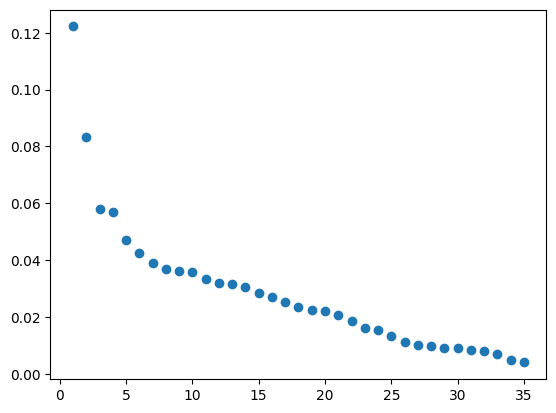

In [5]:
total_inertia = np.sum(D)

svd_inertia = []
index = []

for i in range(len(D)):

  svd_inertia.append(D[i]/total_inertia)
  index.append(i+1)

plt.scatter(index,svd_inertia)

Plot of decreasing singular values. Note that with the three first ones we reach 26% of total inertia of the data.

In [6]:
np.sum(svd_inertia[0:3])

0.26359371392845676

Projection of the matrix of data on principal axis

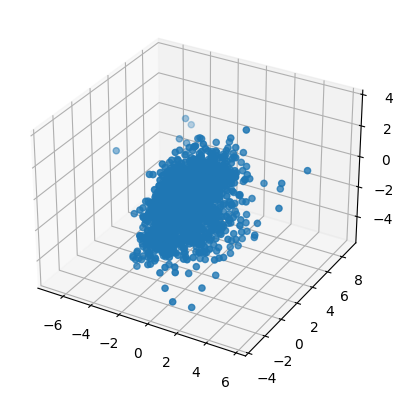

In [7]:
Xp = np.dot(X,Vt)
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(Xp[:,0],Xp[:,1],Xp[:,2]) # Projection on the most relevant axis

AS we can see there are no multiple centers of class. Which means we do not need to wisely select data when creating data sets.

c:\Users\mrxod\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


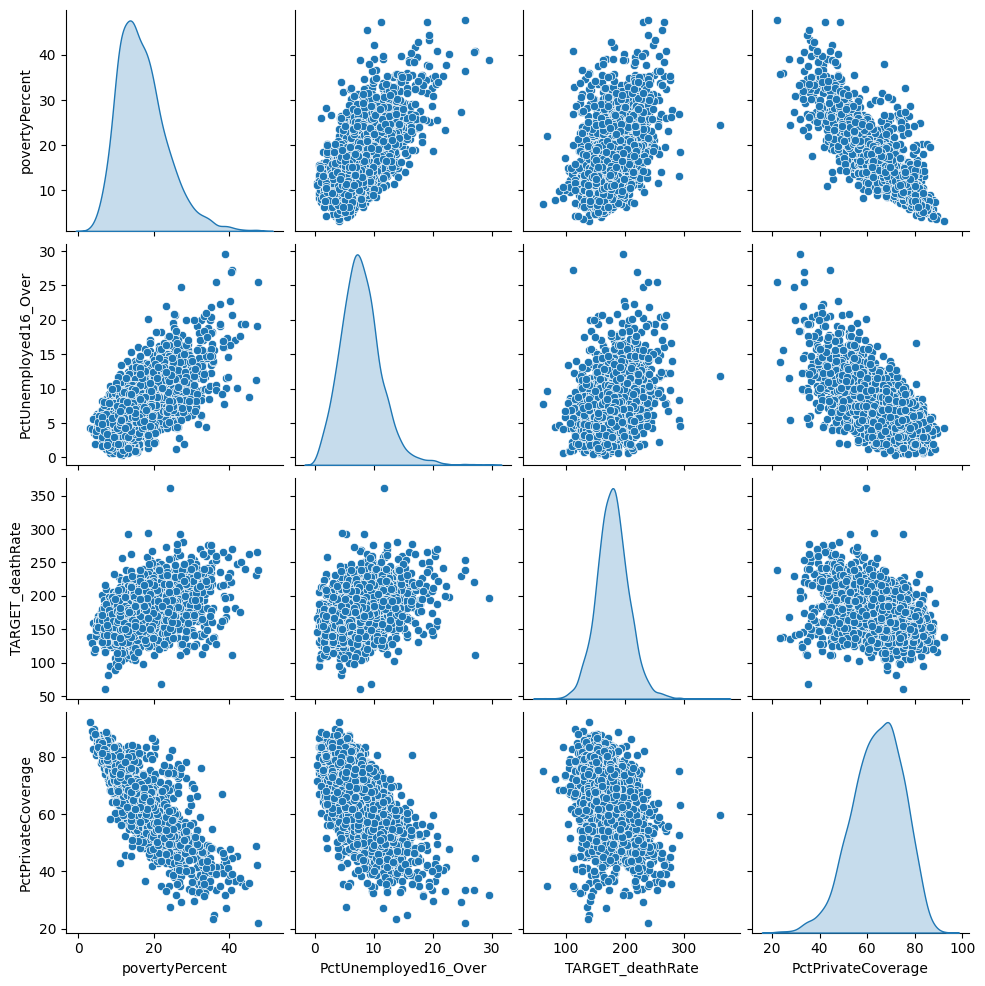

In [8]:
sns.pairplot(load_dtProc.data[['povertyPercent','PctUnemployed16_Over', 'TARGET_deathRate', 'PctPrivateCoverage']], diag_kind='kde')

Check if a linear regression is relevant for TARGET_deathRate

In [9]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AvgHouseholdSize,3047.0,-1.119332e-16,1.000164,-5.727195,-0.255560,0.047397,0.350354,3.473140
BirthRate,3047.0,3.404635e-16,1.000164,-2.840763,-0.563532,-0.130360,0.429804,7.900246
INTPTLAT,3047.0,-3.357997e-16,1.000164,-3.640064,-0.707223,-0.005000,0.649613,6.014324
INTPTLON,3047.0,-7.298979e-16,1.000164,-5.405560,-0.447236,0.131202,0.634327,20.271259
MedianAge,3047.0,-1.947172e-16,1.000164,-0.507149,-0.167171,-0.094318,-0.028089,12.776279
MedianAgeFemale,3047.0,4.430690e-16,1.000164,-3.750075,-0.575460,0.048125,0.596124,4.451014
MedianAgeMale,3047.0,-2.798330e-16,1.000164,-3.286163,-0.616388,0.005603,0.560610,4.809284
PctAsian,3047.0,2.798330e-17,1.000164,-0.480474,-0.383074,-0.269806,-0.012617,15.849758
PctBachDeg18_24,3047.0,-1.445804e-16,1.000164,-1.359951,-0.675370,-0.167454,0.450877,10.079180
PctBachDeg25_Over,3047.0,-1.678998e-16,1.000164,-1.998938,-0.719709,-0.182061,0.522442,5.361268


# Linear regression

In [10]:
phi = X.copy()
phi_lab = phi.pop('TARGET_deathRate')
phi['b'] = np.ones(len(phi.index))    # enable to introduce a bias
Y = X['TARGET_deathRate']
inv_phiT_phi = np.linalg.inv(np.dot(np.transpose(phi),phi))
phiT_Y = np.dot(np.transpose(phi),Y)
weights = np.dot(inv_phiT_phi,phiT_Y)

R2 Computing 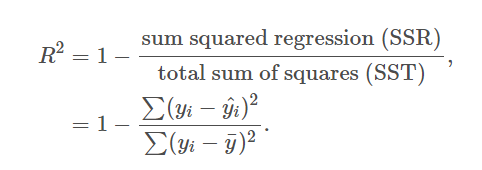

In [11]:
Sum1 = 0
Sum2 = 0
Ymean = np.mean(Y)

for index in phi.index:

  Sum1 += (Y[index]-(np.dot(phi[(phi.index == index)],weights)))**2

  Sum2 += (Y[index]-Ymean)**2

R2 = float(1 - Sum1/Sum2 )

In [12]:
R2      # My R2

0.5332667806724984

In [13]:
reg = LinearRegression().fit(phi, Y)


inferred_body_mass = reg.predict(phi)
model_error = mean_squared_error(phi_lab, inferred_body_mass)

print("The mean squared error is",model_error)
print('R2 is',reg.score(phi, Y))   # R2 of skLearn

The mean squared error is 0.46673321932750206
R2 is 0.533266780672498


# Create model

In [14]:
target_model1 = Model(16,input_size)
target_model2 = Model(32,8,input_size)
target_model3 = Model(32,16,8,input_size)
target_model4 = Model(32,16,8,4,input_size)


INFO:tensorflow:Assets written to: models/ANN-1L-16\assets


INFO:tensorflow:Assets written to: models/ANN-1L-16\assets


INFO:tensorflow:Assets written to: models/ANN-2L-32-8\assets


INFO:tensorflow:Assets written to: models/ANN-2L-32-8\assets


INFO:tensorflow:Assets written to: models/ANN-3L-32-16-8\assets


INFO:tensorflow:Assets written to: models/ANN-3L-32-16-8\assets


INFO:tensorflow:Assets written to: models/ANN-4L-32-16-8-4\assets


INFO:tensorflow:Assets written to: models/ANN-4L-32-16-8-4\assets


# Training

In [15]:
train1 = Training(target_model1.model,load_dtProc.train_features,load_dtProc.train_labels,500)
target_model1.save_model()
train2 = Training(target_model2.model,load_dtProc.train_features,load_dtProc.train_labels,500)
target_model2.save_model()
train3 = Training(target_model3.model,load_dtProc.train_features,load_dtProc.train_labels,500)
target_model3.save_model()
train4 = Training(target_model4.model,load_dtProc.train_features,load_dtProc.train_labels,1000)
target_model4.save_model()

77/77 [==============================] - 0s 526us/step
INFO:tensorflow:Assets written to: models/ANN-1L-16\assets


INFO:tensorflow:Assets written to: models/ANN-1L-16\assets


77/77 [==============================] - 0s 550us/step
INFO:tensorflow:Assets written to: models/ANN-2L-32-8\assets


INFO:tensorflow:Assets written to: models/ANN-2L-32-8\assets


77/77 [==============================] - 0s 558us/step
INFO:tensorflow:Assets written to: models/ANN-3L-32-16-8\assets


INFO:tensorflow:Assets written to: models/ANN-3L-32-16-8\assets


77/77 [==============================] - 0s 544us/step
INFO:tensorflow:Assets written to: models/ANN-4L-32-16-8-4\assets


INFO:tensorflow:Assets written to: models/ANN-4L-32-16-8-4\assets


# Testing

In [16]:
test1 = Testing(target_model1.model,load_dtProc.test_features,load_dtProc.test_labels)
test2 = Testing(target_model2.model,load_dtProc.test_features,load_dtProc.test_labels)
test3 = Testing(target_model3.model,load_dtProc.test_features,load_dtProc.test_labels)
test4 = Testing(target_model4.model,load_dtProc.test_features,load_dtProc.test_labels)

20/20 [==============================] - 0s 586us/step


# Performance

In [17]:
print('For the model '+target_model1.name+' : R2 = ',correlation_coefficient(train1.train_labels,train1.train_predictions),' | MSE = ',train1.get_MSE())
print('For the model '+target_model2.name+' : R2 = ',correlation_coefficient(train2.train_labels,train2.train_predictions),' | MSE = ',train2.get_MSE())
print('For the model '+target_model3.name+' : R2 = ',correlation_coefficient(train3.train_labels,train3.train_predictions),' | MSE = ',train3.get_MSE())
print('For the model '+target_model4.name+' : R2 = ',correlation_coefficient(train4.train_labels,train4.train_predictions),' | MSE = ',train4.get_MSE())

For the model ANN-1L-16 : R2 =  0.5651891374564666  | MSE =  0.43498346910785535
For the model ANN-2L-32-8 : R2 =  0.6095892705485617  | MSE =  0.390565710525947
For the model ANN-3L-32-16-8 : R2 =  0.6025155287252444  | MSE =  0.3976422604076137
For the model ANN-4L-32-16-8-4 : R2 =  0.6429809098970969  | MSE =  0.3571608157216688


In [18]:
print('For the model '+target_model1.name+' : R2 = ',correlation_coefficient(test1.test_labels,test1.test_predictions),' | MSE = ',test1.get_MSE())
print('For the model '+target_model2.name+' : R2 = ',correlation_coefficient(test2.test_labels,test2.test_predictions),' | MSE = ',test2.get_MSE())
print('For the model '+target_model3.name+' : R2 = ',correlation_coefficient(test3.test_labels,test3.test_predictions),' | MSE = ',test3.get_MSE())
print('For the model '+target_model4.name+' : R2 = ',correlation_coefficient(test4.test_labels,test4.test_predictions),' | MSE = ',test4.get_MSE())

For the model ANN-1L-16 : R2 =  0.47912957188971395  | MSE =  0.5197835721431306
For the model ANN-2L-32-8 : R2 =  0.5313810670613539  | MSE =  0.4676411057169431
For the model ANN-3L-32-16-8 : R2 =  0.48335798210569736  | MSE =  0.5155639849906709
For the model ANN-4L-32-16-8-4 : R2 =  0.46584818897999125  | MSE =  0.5330372419221235


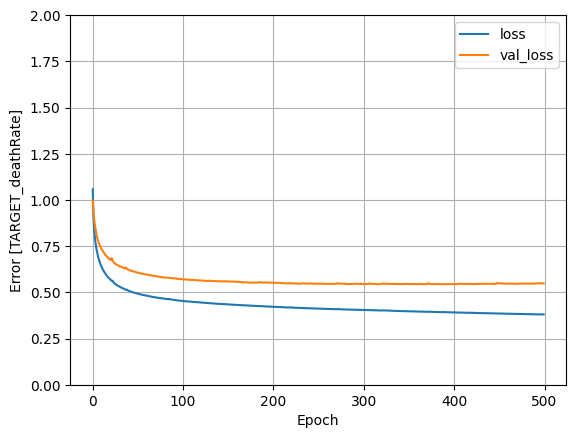

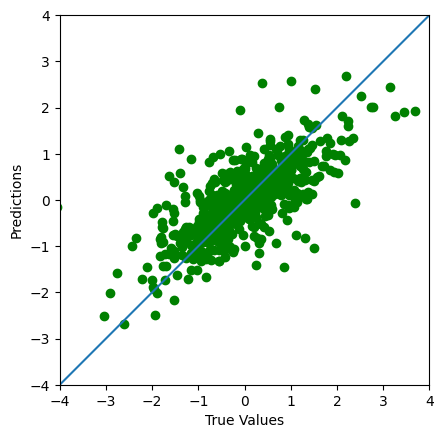

In [19]:
test1.get_plot(train1.history)
test1.get_plot_Pred_TrueVal()

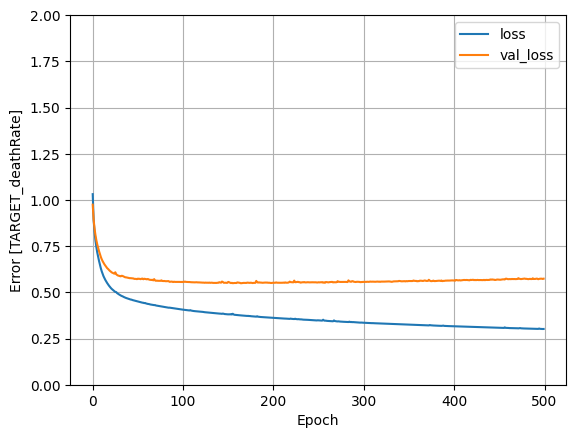

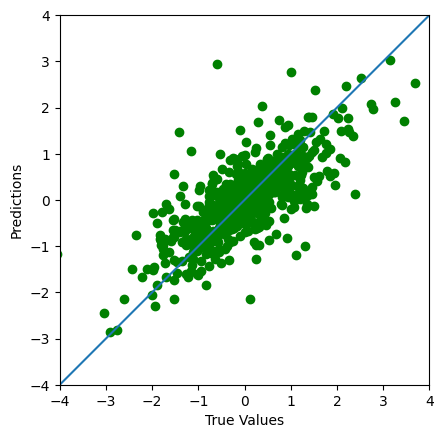

In [20]:
test2.get_plot(train2.history)
test2.get_plot_Pred_TrueVal()


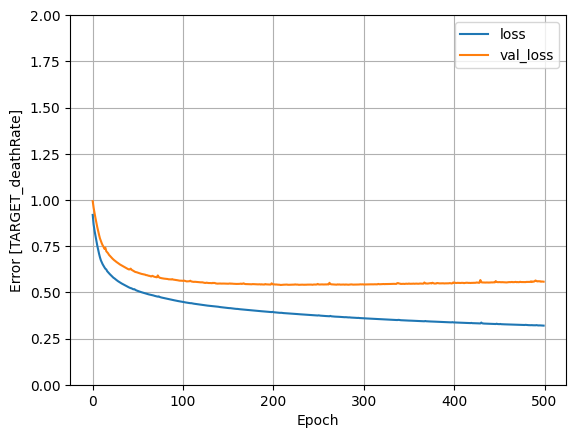

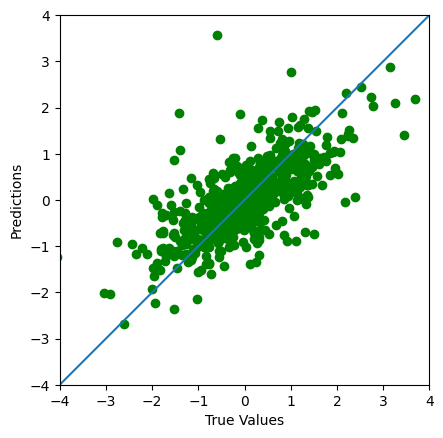

In [21]:
test3.get_plot(train3.history)
test3.get_plot_Pred_TrueVal()

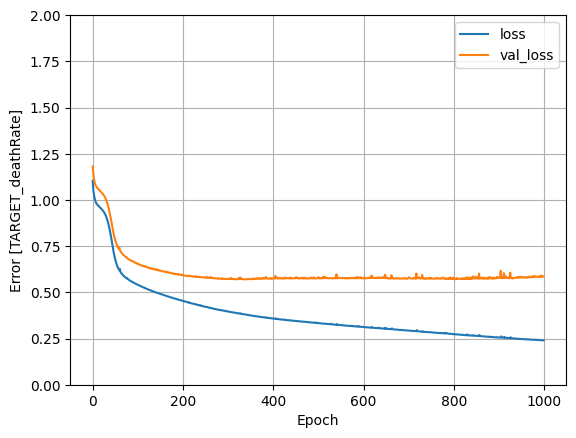

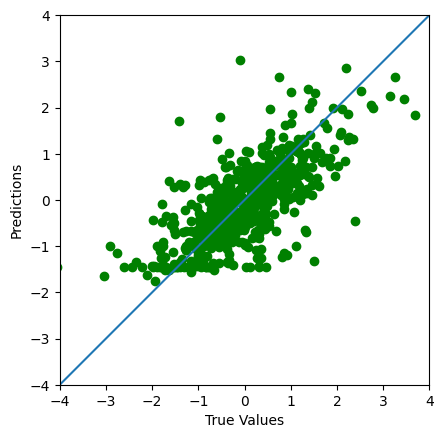

In [22]:
test4.get_plot(train4.history)
test4.get_plot_Pred_TrueVal()

# Other model

INFO:tensorflow:Assets written to: models/ANN-1L-2048\assets


INFO:tensorflow:Assets written to: models/ANN-1L-2048\assets


77/77 [==============================] - 0s 615us/step
INFO:tensorflow:Assets written to: models/ANN-1L-2048\assets


INFO:tensorflow:Assets written to: models/ANN-1L-2048\assets


20/20 [==============================] - 0s 632us/step


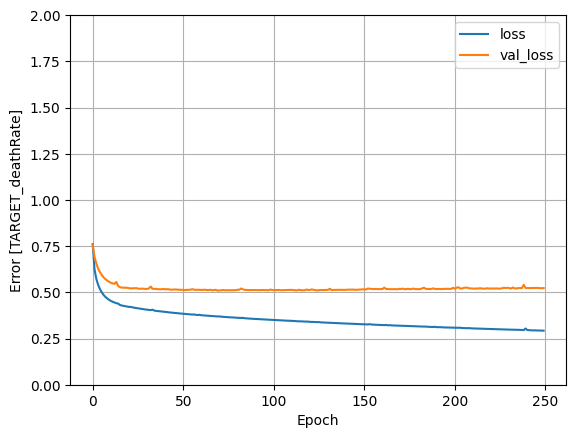

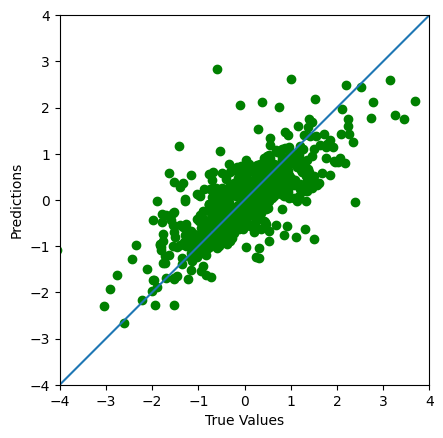

R2 on the training data set :
For the model ANN-1L-2048 : : R2 =  0.5651891374564666  | MSE =  0.36727581232818884
R2 on the test data set :
For the model ANN-1L-2048 : : R2 =  0.5536315048415648  | MSE =  0.4454370960304925


In [23]:

target_model5 = Model(2048,input_size)
train5 = Training(target_model5.model,load_dtProc.train_features,load_dtProc.train_labels,250)
target_model5.save_model()
test5 = Testing(target_model5.model,load_dtProc.test_features,load_dtProc.test_labels)
test5.get_plot(train5.history)
test5.get_plot_Pred_TrueVal()
print('R2 on the training data set :')
print('For the model '+target_model5.name+' : : R2 = ',correlation_coefficient(train5.train_labels,train1.train_predictions),' | MSE = ',train5.get_MSE())
print('R2 on the test data set :')
print('For the model '+target_model5.name+' : : R2 = ',correlation_coefficient(test5.test_labels,test5.test_predictions),' | MSE = ',test5.get_MSE())


# Tuning test

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/50
52/52 [==============================] - 0s 3ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0573 - val_mse: 1.0573
Epoch 2/50
52/52 [==============================] - 0s 1ms/step - loss: 0.9278 - mse: 0.9278 - val_loss: 1.0060 - val_mse: 1.0060
Epoch 3/50
52/52 [==============================] - 0s 1ms/step - loss: 0.8937 - mse: 0.8937 - val_loss: 0.9731 - val_mse: 0.9731
Epoch 4/50
52/52 [==============================] - 0s 1ms/step - loss: 0.8704 - mse: 0.8704 - val_loss: 0.9541 - val_mse: 0.9541
Epoch 5/50
52/52 [==============================] - 0s 1ms/step - loss: 0.8546 - mse: 0.8546 - val_loss: 0.9411 - val_mse: 0.9411
Epoch 6/50
52/52 [==============================] - 0s 1ms/step - loss: 0.8422 - mse: 0.8422 - val_loss: 0.9301 - val_mse: 0.9301
Epoch 7/50
52/52 [==============================] - 0s 1ms/step - loss: 0.8312 - mse: 0.8312 - val_loss: 0.9202 - val_mse: 0.9202
Epoch 8/50
52/52 [==============================] - 0s 1ms/step - loss: 0.8209 - mse: 0.82

INFO:tensorflow:Assets written to: models/ANN-4L-32-16-8-4HP\assets


20/20 [==============================] - 0s 665us/step
HP 0.49745631217956543


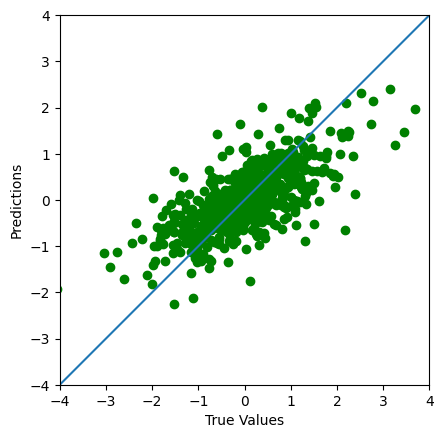

In [24]:
target_model4.creat_tuned_model(train4.train_features,train4.train_labels)
target_model4HP=target_model4.load_model(target_model4.name+'HP')
test4HP = target_model4HP.predict(test4.test_features)
Sum1 = 0
Sum2 = 0

Ymean = np.mean(test4.test_labels)

for i in range(len(test4.test_labels)):
    Sum1 += (test4.test_labels.values[i]-test4HP[i])**2

    Sum2 += (test4.test_labels.values[i]-Ymean)**2

R2 = float(1 - Sum1/Sum2 )
print('HP',R2)
a = plt.axes(aspect='equal')
plt.scatter(test4.test_labels, test4HP,c='green')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-4 ,4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

# Loaded model

## ANN-1L-16

In [25]:
target_modelLoad1 = Model(target_model1.name+'BEST')
testLoad1 = Testing(target_modelLoad1.model,load_dtProc.test_features,load_dtProc.test_labels)
print('For the model '+target_model1.name+'BEST'+' : : R2 = ',correlation_coefficient(testLoad1.test_labels,testLoad1.test_predictions),' | MSE = ',testLoad1.get_MSE())

20/20 [==============================] - 0s 636us/step
For the model ANN-1L-16BEST : : R2 =  0.5516290614142211  | MSE =  0.4474353611296561


In [26]:
target_modelLoad2 = Model(target_model2.name+'BEST')
testLoad2 = Testing(target_modelLoad2.model,load_dtProc.test_features,load_dtProc.test_labels)
print('For the model '+target_model2.name+'BEST'+' : : R2 = ',correlation_coefficient(testLoad2.test_labels,testLoad2.test_predictions),' | MSE = ',testLoad2.get_MSE())

20/20 [==============================] - 0s 636us/step
For the model ANN-2L-32-8BEST : : R2 =  0.5286513827868051  | MSE =  0.47036509419176487


In [27]:
target_modelLoad3 = Model(target_model3.name+'BEST')
testLoad3 = Testing(target_modelLoad3.model,load_dtProc.test_features,load_dtProc.test_labels)
print('For the model '+target_model3.name+'BEST'+' : : R2 = ',correlation_coefficient(testLoad3.test_labels,testLoad3.test_predictions),' | MSE = ',testLoad3.get_MSE())

20/20 [==============================] - 0s 692us/step
For the model ANN-3L-32-16-8BEST : : R2 =  0.5290567015733731  | MSE =  0.4699606211493935


In [28]:
target_modelLoad4 = Model(target_model4.name+'BEST')
testLoad4 = Testing(target_modelLoad4.model,load_dtProc.test_features,load_dtProc.test_labels)
print('For the model '+target_model4.name+'BEST'+' : : R2 = ',correlation_coefficient(testLoad4.test_labels,testLoad4.test_predictions),' | MSE = ',testLoad4.get_MSE())

20/20 [==============================] - 0s 672us/step
For the model ANN-4L-32-16-8-4BEST : : R2 =  0.5490171373654446  | MSE =  0.45004183509894075
